## 1 Prétraitement des données 

    - 1.1 création de tokens
    - 1.2 suppression de la ponctuation (stop words)
    - 1.3 racinisation du mots 
 
## 2 Word embeeding
        
    - 3.1 Classification du texte avec word2vec
    - 3.2 Classification du texte avec BERT
    - 3.3 Classification du texte avec USE

In [1]:
import torch

In [2]:
import tensorflow as tf
import transformers
from transformers import BertTokenizer, BertForSequenceClassification, AdamW


In [3]:
import gensim
from gensim.models import Word2Vec
from nltk.stem import WordNetLemmatizer
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time
%matplotlib inline
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, classification_report


In [4]:
import tensorflow_hub as hub

In [5]:
df = pd.read_csv('Source/flipkart_com-ecommerce_sample_1050.csv',sep=',')

In [6]:
df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."


In [7]:
# premier notebook NLP 40 % 
# deux parties : texte (données non structurées)
# deuxième notebook image 40 % 

cols = ['product_name',
        'product_category_tree',
        'description',
        'brand']

df_texte = df.loc[:,cols]
df_texte

,product_name,product_category_tree,description,brand
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,Elegance
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...,Eurospa
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Oren Empower Extra Large Self Adhesive Sticker...,Oren Empower
1046,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Wallmantra Large Vinyl Sticker Sticker (Pack o...,Wallmantra
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Uberlyfe
1048,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Wallmantra


In [8]:
# lire des caractère sur une image
import nltk
nltk.download('punkt')
tokenizer = nltk.RegexpTokenizer(r'\w+')
token = np.array(df_texte.product_category_tree)

token = [tokenizer.tokenize(i.lower()) for i in token]

bigram = [list(nltk.bigrams(bigram)) for bigram in token]

token_bigram = pd.Series(bigram)

cat_name = np.array([token_bigram[i][0] for i in range(len(token_bigram))])

    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dragomir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# Les documents sont répartis en 6 classes

df_token = pd.DataFrame(cat_name, columns=['cat1','cat2'])
df_token.loc[df_token.cat1 == 'baby','cat1'] = 'baby_care'
df_token = df_token.cat1

In [10]:
df_texte['category_name'] = df_token

In [11]:
df_texte.loc[df_texte.category_name == 'computers laptops','category_name'] = 'computers laptop'

In [12]:
token2 = np.array(df_texte.description)
token2 = [tokenizer.tokenize(i.lower()) for i in token2]

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dragomir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
sw = set()
sw.update(tuple(nltk.corpus.stopwords.words('english')))

In [15]:
descript_sw = [[idx for idx in token if idx not in sw] for token in token2]

## 2 Word embeding
### 2.1 Word2vec

In [18]:
import gensim
from gensim.models import Word2Vec
from sklearn import preprocessing

In [19]:
# preprocessing encodage des données
encodage = preprocessing.LabelEncoder()
encodage.fit(df_texte.category_name)
df_texte["label_cat1"] = encodage.transform(df_texte.category_name)
# data.head(5)
df_texte.category_name.value_counts()

home         300
baby_care    150
watches      150
kitchen      150
beauty       150
computers    150
Name: category_name, dtype: int64

In [20]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

Lemmatise_corpus = [[lemmatizer.lemmatize(Lemma) for Lemma in descript_sw[idx]] for idx in range(len(descript_sw))]

Lemmatise_corpus[0][10]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dragomir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dragomir\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


'curtain'

In [22]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

Lemmatise_corpus = [[lemmatizer.lemmatize(Lemma) for Lemma in Stem_word2[idx]] for idx in range(len(Stem_word2))]

Lemmatise_corpus[0][10]
                                        

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dragomir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dragomir\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


'curtain'

In [21]:
model = Word2Vec(Lemmatise_corpus, min_count=1,hs=1,negative=0,sg=0,epochs=5)  # min_count spécifie la fréquence minimale d'un mot pour être inclus dans le modèle

In [22]:
model.wv.most_similar('home')

[('gifting', 0.8180132508277893),
 ('crafted', 0.7532199621200562),
 ('look', 0.7351768612861633),
 ('wood', 0.7313286662101746),
 ('express', 0.7120227217674255),
 ('gift', 0.7108761072158813),
 ('pic', 0.7059637904167175),
 ('trend', 0.6966291069984436),
 ('bring', 0.6710289716720581),
 ('one', 0.6704117059707642)]

In [24]:
category_name = [tokenizer.tokenize(i) for i in df_texte.category_name.unique()]
category_name

[['home'], ['baby_care'], ['watches'], ['kitchen'], ['beauty'], ['computers']]

In [25]:
documents = Lemmatise_corpus

# Initialize an empty array to store document vectors
document_vectors = np.zeros((len(documents), model.vector_size))
tab = []
save = [tab.append(len(doc)) for doc in documents]


In [26]:
# récupére tous les vecteurs 
def wvector(corpus,model):
    # List of documents
    documents = corpus

    # Initialize an empty array to store document vectors
    document_vectors = np.zeros((len(documents), model.vector_size))
    # Iterate over each document

    for i, doc in enumerate(documents):
        # Split the document into individual words
        words = doc
        # Initialize an empty array to store word vectors
        word_vectors = np.zeros((len(words), model.vector_size))

        #document_vectors = np.zeros((len(documents), model.vector_size))

        # Iterate over each word in the document
        for j, word in enumerate(words):
            # Check if the word is in the vocabulary of the model
            if word in model.wv.index_to_key:
                # Get the word vector
                word_vectors[j] = model.wv[word]
        # Calculate the average vector of the document
        if len(word_vectors) > 0:
            #print(word_vectors.shape)
            document_vectors[i] = np.mean(word_vectors, axis=0)
    return document_vectors
        
    

In [27]:
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV


In [28]:
def create_pipeline_evaluate_model(index_fold, X_train, X_test, y_train, y_test,idx_train,idx_test):
    
        model = Pipeline([
                         ("classifier",SVC())
                         ])

        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        score = model.score(X_test,y_test)     
        print(f"Run {index_fold} : score = {round(score,2)} ")
        return (score)

In [29]:
nb_model = 5
index_fold = 0
kf = KFold(n_splits=nb_model, shuffle=False)
average_score = 0
model = Word2Vec(Lemmatise_corpus, min_count=1,hs=1,negative=0,sg=1,epochs=5)  

X = wvector(Lemmatise_corpus,model)
y = df_texte.label_cat1

kf = KFold(n_splits=nb_model)

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    score = create_pipeline_evaluate_model(index_fold, X_train, X_test, y_train, y_test,train_index,test_index)    
    average_score += score
    index_fold += 1
    
average_score = average_score / nb_model
print('La score moyen est de : ',average_score*100,'%')

Run 0 : score = 0.74 
Run 1 : score = 0.75 
Run 2 : score = 0.93 
Run 3 : score = 0.8 
Run 4 : score = 0.71 
La score moyen est de :  78.76190476190476 %


In [30]:
model = Word2Vec(Lemmatise_corpus, min_count=1,hs=1,negative=0,sg=1,epochs=5)  

X = wvector(Lemmatise_corpus,model)
y = df_texte.label_cat1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
                 ("classifier",SVC())
                 ])

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

score = model.score(X_test,y_test)     
print(f"Run {index_fold} : score = {round(score,2)} ")



Run 5 : score = 0.92 


In [31]:
pipe = Pipeline([
                ("estimator",LogisticRegression())
                ])
pipe


# Vectorise les mots avec la méthode continu bag of words
# min_count spécifie la fréquence minimale d'un mot pour être inclus dans le modèle
# epochs signifie que le réseau de neuronne va s'entrainer un nombre de fois sur les données 
model = Word2Vec(Lemmatise_corpus, min_count=1,hs=1,negative=0,sg=0,epochs=5)  

# retoune les vecteurs de mots par document
vectors = wvector(Lemmatise_corpus,model)
X = vectors
y = df_texte.label_cat1


param_grid = {
              'estimator':[RandomForestClassifier(),
                           AdaBoostClassifier(),
                           GradientBoostingClassifier(),
                           ExtraTreesClassifier(),
                           DecisionTreeClassifier(),
                           SVC(),
                           BaggingClassifier(),
                           KNeighborsClassifier(13),
                           LogisticRegression()
                          ]}


grid = GridSearchCV(pipe,param_grid=param_grid, cv=10,return_train_score=True ,n_jobs=-1, verbose=1)

grid.fit(X,y)

grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:,new_cols].sort_values('mean_test_score', ascending=False)



Fitting 10 folds for each of 9 candidates, totalling 90 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
3,0.616073,0.044052,0.018407,0.004801,ExtraTreesClassifier(),{'estimator': ExtraTreesClassifier()},0.835238,0.110497,1,1.000000,0.000000
5,0.069311,0.009804,0.020854,0.003679,SVC(),{'estimator': SVC()},0.827619,0.116132,2,0.874497,0.003146
8,0.107937,0.028727,0.001300,0.000458,LogisticRegression(),{'estimator': LogisticRegression()},0.823810,0.112143,3,0.863175,0.008740
0,3.775418,0.346042,0.018356,0.004811,RandomForestClassifier(),{'estimator': RandomForestClassifier()},0.821905,0.121819,4,1.000000,0.000000
2,103.486430,1.401308,0.003102,0.000835,GradientBoostingClassifier(),{'estimator': GradientBoostingClassifier()},0.820000,0.124936,5,1.000000,0.000000
7,0.004802,0.003311,0.051213,0.082561,KNeighborsClassifier(n_neighbors=13),{'estimator': KNeighborsClassifier(n_neighbors...,0.794286,0.123897,6,0.871534,0.004968
6,3.408946,0.102165,0.005503,0.001284,BaggingClassifier(),{'estimator': BaggingClassifier()},0.789524,0.110612,7,0.995026,0.002369
4,0.404929,0.047198,0.001201,0.000400,DecisionTreeClassifier(),{'estimator': DecisionTreeClassifier()},0.751429,0.112240,8,1.000000,0.000000
1,3.523747,0.404947,0.021253,0.002733,AdaBoostClassifier(),{'estimator': AdaBoostClassifier()},0.480952,0.139728,9,0.505291,0.079071


In [34]:


pipe = Pipeline([
                ("estimator",LogisticRegression())
                ])


# sg = 1 signifie que le modèle va vectorise les mots avec la méthode skip-gramms
# min_count spécifie la fréquence minimale d'un mot pour être inclus dans le modèle
# epochs signifie que le réseau de neuronne va s'entrainer un nombre de fois sur les données 
model = Word2Vec(Lemmatise_corpus, min_count=1,hs=1,negative=0,sg=1,epochs=5)  
vectors = wvector(Lemmatise_corpus,model)

X = vectors
y = df_texte.label_cat1

param_grid = {
              'estimator':[RandomForestClassifier(),
                           AdaBoostClassifier(),
                           GradientBoostingClassifier(),
                           ExtraTreesClassifier(),
                           DecisionTreeClassifier(),
                           SVC(),
                           BaggingClassifier(),
                           KNeighborsClassifier(13),
                           LogisticRegression()
                          ]}


grid = GridSearchCV(pipe,param_grid=param_grid, cv=10,return_train_score=True ,n_jobs=-1, verbose=1)

grid.fit(X,y)

grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:,new_cols].sort_values('mean_test_score', ascending=False)



Fitting 10 folds for each of 9 candidates, totalling 90 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
5,0.070515,0.023046,0.026710,0.012168,SVC(),{'estimator': SVC()},0.881905,0.080835,1,0.931746,0.003734
3,0.663408,0.096408,0.019104,0.004173,ExtraTreesClassifier(),{'estimator': ExtraTreesClassifier()},0.872381,0.092748,2,1.000000,0.000000
8,0.098176,0.015199,0.001302,0.000459,LogisticRegression(),{'estimator': LogisticRegression()},0.869524,0.092440,3,0.912804,0.003386
2,104.666270,1.074915,0.003601,0.000663,GradientBoostingClassifier(),{'estimator': GradientBoostingClassifier()},0.861905,0.078217,4,1.000000,0.000000
0,3.431471,0.406913,0.020204,0.007922,RandomForestClassifier(),{'estimator': RandomForestClassifier()},0.853333,0.097887,5,1.000000,0.000000
7,0.002300,0.000458,0.005800,0.002786,KNeighborsClassifier(n_neighbors=13),{'estimator': KNeighborsClassifier(n_neighbors...,0.843810,0.120181,6,0.913651,0.004990
6,3.481584,0.413707,0.005006,0.000588,BaggingClassifier(),{'estimator': BaggingClassifier()},0.816190,0.098243,7,0.996402,0.002376
4,0.445091,0.060532,0.001602,0.000490,DecisionTreeClassifier(),{'estimator': DecisionTreeClassifier()},0.743810,0.114321,8,1.000000,0.000000
1,3.381593,0.349984,0.025004,0.007756,AdaBoostClassifier(),{'estimator': AdaBoostClassifier()},0.513333,0.098003,9,0.516085,0.096605


In [35]:

from sklearn.metrics import accuracy_score, precision_recall_fscore_support as score
logistic = LogisticRegression()

model = Word2Vec(Lemmatise_corpus, min_count=1,hs=1,negative=0,sg=1,epochs=5)  
vectors = wvector(Lemmatise_corpus,model)

X = vectors
y = df_texte.label_cat1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
logistic.fit(X_train, y_train)



LogisticRegression()

### prédictions des documents 

In [36]:
y_pred = logistic.predict(X_test)
y_pred

array([3, 2, 5, 4, 3, 4, 5, 3, 3, 3, 0, 5, 3, 5, 2, 4, 2, 3, 0, 5, 3, 4,
       5, 3, 3, 2, 3, 3, 3, 4, 0, 5, 0, 1, 1, 1, 3, 3, 1, 3, 4, 5, 2, 5,
       3, 0, 5, 2, 5, 3, 1, 2, 4, 0, 0, 3, 3, 3, 3, 1, 5, 3, 2, 3, 4, 3,
       3, 3, 3, 1, 5, 3, 2, 3, 3, 5, 2, 5, 2, 2, 3, 4, 1, 3, 3, 4, 2, 5,
       3, 2, 0, 1, 3, 5, 1, 4, 2, 1, 3, 1, 1, 1, 5, 4, 5, 3, 3, 1, 4, 3,
       3, 3, 2, 3, 3, 4, 3, 2, 2, 2, 3, 3, 3, 0, 3, 3, 2, 1, 1, 5, 2, 1,
       2, 3, 2, 0, 0, 3, 3, 2, 5, 4, 3, 0, 3, 3, 5, 3, 3, 3, 3, 5, 1, 3,
       1, 3, 5, 5, 3, 2, 2, 3, 3, 1, 3, 5, 5, 5, 3, 3, 2, 4, 2, 4, 1, 0,
       3, 0, 3, 5, 3, 3, 5, 2, 3, 3, 3, 4, 3, 5, 3, 3, 0, 0, 1, 3, 0, 3,
       1, 3, 2, 5, 4, 3, 2, 3, 4, 3, 3, 5])

In [37]:
np.array(y_test)

array([3, 2, 5, 4, 3, 4, 5, 3, 3, 3, 0, 5, 0, 5, 2, 4, 2, 3, 1, 5, 3, 4,
       5, 2, 1, 1, 1, 3, 0, 4, 0, 5, 4, 1, 1, 1, 3, 3, 1, 3, 4, 5, 2, 5,
       3, 0, 5, 2, 5, 3, 1, 2, 4, 0, 0, 3, 3, 3, 3, 1, 5, 0, 2, 3, 4, 3,
       3, 3, 3, 1, 5, 3, 2, 3, 1, 5, 1, 5, 2, 2, 4, 4, 1, 3, 3, 4, 2, 5,
       3, 2, 0, 1, 3, 5, 3, 4, 2, 1, 3, 1, 1, 1, 5, 4, 5, 3, 3, 1, 4, 3,
       3, 3, 2, 3, 3, 4, 3, 2, 2, 2, 3, 3, 3, 0, 3, 3, 2, 1, 1, 5, 2, 4,
       2, 3, 3, 0, 0, 3, 3, 2, 5, 4, 3, 0, 3, 3, 5, 4, 3, 1, 3, 5, 0, 3,
       1, 3, 5, 5, 3, 2, 2, 3, 3, 1, 3, 5, 5, 5, 3, 3, 2, 4, 2, 4, 1, 0,
       0, 0, 0, 5, 3, 3, 5, 2, 0, 3, 3, 4, 0, 5, 3, 3, 0, 0, 1, 3, 0, 0,
       0, 3, 2, 5, 4, 3, 2, 0, 4, 0, 0, 5])

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.54      0.67        28
           1       0.83      0.74      0.78        27
           2       0.90      0.97      0.93        29
           3       0.79      0.97      0.87        69
           4       1.00      0.83      0.91        24
           5       1.00      1.00      1.00        33

    accuracy                           0.87       210
   macro avg       0.90      0.84      0.86       210
weighted avg       0.88      0.87      0.87       210



### 2.2 Classification des documents avec BERT


In [39]:
tokens = []
_ = [tokens.append(str(txt).replace("'", '').replace(",","").replace("[",'').replace("]",'')) for txt in Lemmatise_corpus]
print('Max sentence length: ', max([len(sen) for sen in tokens]))


Max sentence length:  2620


In [40]:
torch.device("cuda")

device(type='cuda')

In [41]:
# Prétraitement des textes et des étiquettes
# utiliser la CPU 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = 'bert-base-uncased'

model = BertForSequenceClassification.from_pretrained(model_name, num_labels = 13)

model.to(device)
tokenizer = BertTokenizer.from_pretrained(model_name)

inputs = tokenizer(tokens,
                   padding=True,
                   truncation=True,
                   max_length= 100,
                   return_tensors="pt")

labels = torch.tensor(df_texte.label_cat1 , dtype=torch.long)

inputs.to(device)

labels.to(device)
# Entraîner le modèle



Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

tensor([3, 0, 0,  ..., 0, 0, 0])

In [42]:
device = torch.device("cuda")
device

device(type='cuda')

In [43]:

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(inputs['input_ids'], labels, 
                                                            random_state=2018, test_size=0.2)
# Performing same steps on the attention masks
train_masks, validation_masks, _, _ = train_test_split(inputs['attention_mask'], labels,
                                             random_state=2018, test_size=0.2)

In [44]:
len(train_inputs), len(train_masks), len(train_labels), len(validation_inputs), len(validation_masks[:840]), len(validation_labels)

(840, 840, 840, 210, 210, 210)

In [45]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#Creating the DataLoader which will help us to load data into the GPU/CPU
batch_size = 20

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [46]:
# AdamW is an optimizer which is a Adam Optimzier with weight-decay-fix
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8 
                )

C:\Users\Dragomir\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [47]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 2

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs
print(len(train_dataloader))
# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
scheduler

42


In [48]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return sum(pred_flat == labels_flat) / len(labels_flat)



In [49]:
#Creating the helper function to have a watch on elapsed time

import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [50]:
# Store the average loss after each epoch so we can plot them.
loss_values = []
accuracy = []
epochs = 5
def train_bert(epochs,train_dataloader,validation_dataloader):
    for epoch in range(0,epochs):
        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch + 1, epochs))
        print('Training...')

        t0 = time.time()
        model.train()
        total_loss = 0

        for step, batch in enumerate(train_dataloader):
            b_input_ids = batch[0]
            b_input_mask = batch[1]
            b_labels = batch[2]

            # Always clear any previously calculated gradients before performing a
            # backward pass. PyTorch doesn't do this automatically because 
            # accumulating the gradients is "convenient while training RNNs". 
            # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
            model.zero_grad()  
            # Progress update every 40 batches.
            if step % 10 == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

            optimizer.zero_grad()

            outputs = model(input_ids = b_input_ids ,attention_mask = b_input_mask, labels=b_labels)

            # The call to `model` always returns a tuple, so we need to pull the 
            # loss value out of the tuple.
            loss = outputs[0]

            # Accumulate the training loss over all of the batches so that we can
            # calculate the average loss at the end. `loss` is a Tensor containing a
            # single value; the `.item()` function just returns the Python value 
            # from the tensor.
            total_loss += loss.item()

            # Perform a backward pass to calculate the gradients.
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and take a step using the computed gradient.
            # The optimizer dictates the "update rule"--how the parameters are
            # modified based on their gradients, the learning rate, etc.
            optimizer.step()

            # Update the learning rate.
            scheduler.step()

            # Calculate the average loss over the training data.
            avg_train_loss = total_loss / len(train_dataloader)            

            # Store the loss value for plotting the learning curve.
            
            if step == 40:
                print("")
                loss_values.append(avg_train_loss)
                print("  Average training loss: {0:.2f}".format(avg_train_loss))
                print("  Training epoch took: {:}".format(format_time(time.time() - t0)))

                print("")
                print("Running Validation...")

        t0 = time.time()

        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()

        # Tracking variables 
        eval_loss, eval_accuracy = 0, 0
        nb_eval_steps, nb_eval_examples = 0, 0

        for batch in validation_dataloader:


            batch = tuple(t for t in batch)

            # Unpack the inputs from our dataloader
            b_input_ids, b_input_mask, b_labels = batch

            # Telling the model not to compute or store gradients, saving memory and
            # speeding up validation
            with torch.no_grad():        

                # Forward pass, calculate logit predictions.
                # This will return the logits rather than the loss because we have
                # not provided labels.
                # token_type_ids is the same as the "segment ids", which 
                # differentiates sentence 1 and 2 in 2-sentence tasks.
                # The documentation for this `model` function is here: 
                # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
                outputs = model(b_input_ids,
                                token_type_ids=None, 
                                attention_mask=b_input_mask)
            # Put the model in evaluation mode--the dropout layers behave differently
            # during evaluation.
            logits = outputs[0]

            # Calculate the accuracy for this batch of test sentences.
            tmp_eval_accuracy = flat_accuracy(logits, b_labels)

            # Accumulate the total accuracy.
            eval_accuracy += tmp_eval_accuracy

            # Track the number of batches
            nb_eval_steps += 1
            

        result_eval = eval_accuracy/nb_eval_steps
            
        accuracy.append(result_eval)
        # Report the final accuracy for this validation run.
        print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
        print("  Validation took: {:}".format(format_time(time.time() - t0)))
    return loss_values, accuracy
    

In [51]:
loss_, accuracy_ = train_bert(epochs,train_dataloader,validation_dataloader)


======== Epoch 1 / 5 ========
Training...
  Batch    10  of     42.    Elapsed: 0:01:16.
  Batch    20  of     42.    Elapsed: 0:02:32.
  Batch    30  of     42.    Elapsed: 0:03:51.
  Batch    40  of     42.    Elapsed: 0:05:07.

  Average training loss: 1.91
  Training epoch took: 0:05:14

Running Validation...
  Accuracy: 0.65
  Validation took: 0:00:27

======== Epoch 2 / 5 ========
Training...
  Batch    10  of     42.    Elapsed: 0:01:19.
  Batch    20  of     42.    Elapsed: 0:02:41.
  Batch    30  of     42.    Elapsed: 0:04:01.
  Batch    40  of     42.    Elapsed: 0:05:23.

  Average training loss: 1.34
  Training epoch took: 0:05:31

Running Validation...
  Accuracy: 0.73
  Validation took: 0:00:28

======== Epoch 3 / 5 ========
Training...
  Batch    10  of     42.    Elapsed: 0:01:18.
  Batch    20  of     42.    Elapsed: 0:02:37.
  Batch    30  of     42.    Elapsed: 0:03:56.
  Batch    40  of     42.    Elapsed: 0:05:15.

  Average training loss: 1.23
  Training epoch t

In [52]:
accuracy_score = np.array(accuracy_)
average_training_loss = loss_values
len(accuracy_score),len(average_training_loss)


(5, 5)

Text(0.5, 0, 'nombre itérations')

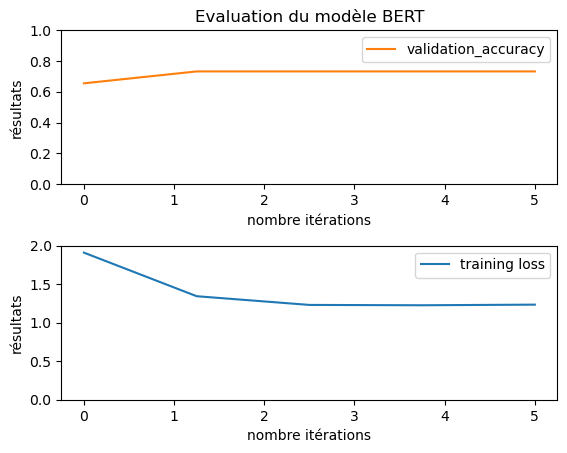

In [59]:
x = np.linspace(0,5,5)
fig, ax = plt.subplots(2,1)  # Create a figure and an axes.
fig.subplots_adjust(hspace=0.4)
ax[0].plot(x, accuracy_, label='validation_accuracy',color ='C1')  # Plot some data on the axes.
ax[0].set_xlabel('nombre itérations')  # Add an x-label to the axes.
ax[0].set_ylim([0,1])
ax[0].set_title("Evaluation du modèle BERT")  # Add a title to the axes.
ax[0].set_ylabel('résultats')  # Add a y-label to the axes.
ax[0].legend()  # Add a legend.
ax[1].plot(x, average_training_loss, label='training loss')  # Plot more data on the axes...
ax[1].set_ylabel('résultats')  # Add a y-label to the axes.
ax[1].set_ylim([0,2])
ax[1].legend()  # Add a legend.
ax[1].set_xlabel('nombre itérations')  # Add an x-label to the axes.



In [60]:
print('classe du texte à prédire'.format(labels[12]))

classe du texte à prédire


In [61]:
def eval_bert():
    model.eval()
    
    t0 =  time.time()
    y_pred  = []
    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    for batch in validation_dataloader:
        
        batch = tuple(t for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids,
                            token_type_ids=None, 
                            attention_mask=b_input_mask,
                            output_hidden_states = True)
        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        logits = outputs[0]
        out = outputs
        
        #récupère les prédictions
        y_pred.append(logits)
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, b_labels)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1
        print('batch step : ',nb_eval_steps)
    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
    return y_pred,out

In [62]:
pred, out  = eval_bert()

batch step :  1
batch step :  2
batch step :  3
batch step :  4
batch step :  5
batch step :  6
batch step :  7
batch step :  8
batch step :  9
batch step :  10
batch step :  11
  Accuracy: 0.73
  Validation took: 0:00:27


In [63]:
pred_labels = []
for nb, classe in enumerate(pred):
    for i in range(len(pred[nb])):
        predicted_class = torch.argmax(pred[nb][i]).item()
        pred_labels.append(predicted_class)

In [64]:
# les vecteurs de mots

len(out.hidden_states[0][0][0])

768

In [65]:
np.array(pred_labels)

array([3, 1, 3, 5, 3, 3, 0, 3, 2, 1, 3, 3, 1, 3, 2, 3, 3, 2, 3, 3, 5, 0,
       3, 3, 1, 3, 3, 3, 3, 5, 3, 3, 3, 2, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 5, 1, 0, 3, 3, 3, 3, 2, 3, 1, 0, 3, 3, 3, 3, 2, 3, 1, 0,
       2, 3, 5, 2, 3, 3, 3, 3, 1, 0, 3, 4, 3, 5, 5, 3, 0, 3, 0, 1, 3, 3,
       2, 2, 3, 2, 3, 3, 2, 2, 1, 2, 2, 1, 5, 3, 3, 3, 0, 3, 1, 2, 5, 3,
       1, 3, 2, 3, 5, 1, 5, 2, 3, 1, 2, 3, 0, 3, 1, 3, 1, 3, 2, 0, 2, 0,
       5, 3, 3, 1, 5, 4, 3, 0, 3, 3, 2, 2, 0, 5, 0, 3, 3, 3, 0, 0, 2, 3,
       3, 0, 3, 3, 5, 3, 5, 5, 3, 1, 3, 3, 2, 4, 3, 3, 3, 3, 3, 1, 5, 3,
       3, 3, 5, 3, 3, 3, 3, 0, 1, 2, 5, 3, 3, 2, 0, 3, 3, 3, 2, 3, 3, 5,
       2, 2, 3, 2, 1, 0, 3, 0, 0, 3, 3, 3])

In [66]:
validation_labels

tensor([3, 5, 3, 5, 3, 3, 3, 3, 2, 1, 3, 4, 1, 3, 2, 3, 3, 2, 4, 2, 5, 0, 3, 3,
        1, 4, 4, 3, 3, 5, 3, 0, 3, 2, 3, 4, 1, 2, 4, 4, 4, 3, 3, 3, 3, 4, 0, 5,
        1, 0, 4, 3, 3, 5, 2, 4, 1, 0, 1, 3, 3, 0, 2, 0, 1, 0, 2, 0, 5, 2, 3, 1,
        0, 3, 1, 0, 0, 4, 0, 5, 5, 4, 0, 4, 0, 4, 1, 3, 2, 2, 3, 2, 3, 3, 2, 2,
        1, 2, 2, 3, 5, 3, 3, 3, 0, 3, 1, 2, 5, 3, 1, 3, 2, 0, 5, 1, 5, 2, 3, 1,
        2, 3, 0, 4, 1, 4, 1, 3, 2, 0, 2, 0, 5, 3, 3, 3, 5, 4, 4, 0, 3, 4, 2, 2,
        1, 5, 1, 3, 4, 3, 0, 0, 2, 3, 3, 0, 3, 3, 5, 4, 5, 5, 4, 1, 3, 3, 2, 4,
        1, 4, 3, 5, 0, 1, 5, 3, 4, 4, 5, 4, 4, 3, 3, 0, 1, 2, 5, 5, 3, 2, 0, 3,
        3, 3, 2, 3, 3, 5, 2, 2, 4, 2, 1, 0, 0, 0, 3, 4, 3, 0])

In [67]:
print(classification_report(validation_labels,pred_labels))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73        31
           1       0.83      0.76      0.79        25
           2       1.00      0.97      0.98        33
           3       0.57      0.94      0.71        65
           4       1.00      0.10      0.18        31
           5       1.00      0.84      0.91        25

    accuracy                           0.74       210
   macro avg       0.87      0.71      0.72       210
weighted avg       0.82      0.74      0.71       210



### 2.3 Classification de texte avec Universal sentence encoder

In [68]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed(tokens)

print(embeddings)

tf.Tensor(
[[-0.05380953 -0.05427526  0.03763935 ...  0.04525556  0.0400887
  -0.04485746]
 [-0.0504561  -0.04426588  0.0262354  ...  0.02325921  0.02831347
   0.03676867]
 [-0.05464859 -0.05145617 -0.02325417 ...  0.05250543 -0.03077259
  -0.04503982]
 ...
 [-0.01919353 -0.04591073 -0.02684828 ... -0.02107586  0.04736629
  -0.0543308 ]
 [-0.0112249  -0.04495183  0.03897667 ...  0.01591754 -0.01513253
  -0.00175135]
 [-0.05246769 -0.04012159  0.03473873 ...  0.02537613 -0.01057997
   0.002412  ]], shape=(1050, 512), dtype=float32)


In [69]:
embeddings

<tf.Tensor: shape=(1050, 512), dtype=float32, numpy=
array([[-0.05380953, -0.05427526,  0.03763935, ...,  0.04525556,
         0.0400887 , -0.04485746],
       [-0.0504561 , -0.04426588,  0.0262354 , ...,  0.02325921,
         0.02831347,  0.03676867],
       [-0.05464859, -0.05145617, -0.02325417, ...,  0.05250543,
        -0.03077259, -0.04503982],
       ...,
       [-0.01919353, -0.04591073, -0.02684828, ..., -0.02107586,
         0.04736629, -0.0543308 ],
       [-0.0112249 , -0.04495183,  0.03897667, ...,  0.01591754,
        -0.01513253, -0.00175135],
       [-0.05246769, -0.04012159,  0.03473873, ...,  0.02537613,
        -0.01057997,  0.002412  ]], dtype=float32)>

In [70]:
embeddings.shape
embeddings.numpy()

array([[-0.05380953, -0.05427526,  0.03763935, ...,  0.04525556,
         0.0400887 , -0.04485746],
       [-0.0504561 , -0.04426588,  0.0262354 , ...,  0.02325921,
         0.02831347,  0.03676867],
       [-0.05464859, -0.05145617, -0.02325417, ...,  0.05250543,
        -0.03077259, -0.04503982],
       ...,
       [-0.01919353, -0.04591073, -0.02684828, ..., -0.02107586,
         0.04736629, -0.0543308 ],
       [-0.0112249 , -0.04495183,  0.03897667, ...,  0.01591754,
        -0.01513253, -0.00175135],
       [-0.05246769, -0.04012159,  0.03473873, ...,  0.02537613,
        -0.01057997,  0.002412  ]], dtype=float32)

In [71]:
pipe = Pipeline([
                ("estimator",LogisticRegression())
                ])
pipe

X = embeddings.numpy()
y = df_texte.label_cat1

param_grid = {
              'estimator':[RandomForestClassifier(),
                           AdaBoostClassifier(),
                           GradientBoostingClassifier(),
                           ExtraTreesClassifier(),
                           DecisionTreeClassifier(),
                           SVC(),
                           BaggingClassifier(),
                           KNeighborsClassifier(13),
                           LogisticRegression()
                          ]}


grid = GridSearchCV(pipe,param_grid=param_grid, cv=10,return_train_score=True ,n_jobs=-1, verbose=1)

grid.fit(X,y)

grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:,new_cols].sort_values('mean_test_score', ascending=False)



Fitting 10 folds for each of 9 candidates, totalling 90 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
5,0.261920,0.059415,0.061820,0.007485,SVC(),{'estimator': SVC()},0.887619,0.083005,1,0.978307,0.003183
8,0.231677,0.034976,0.001603,0.000490,LogisticRegression(),{'estimator': LogisticRegression()},0.884762,0.087022,2,0.941481,0.003961
0,7.829844,0.600732,0.021101,0.006107,RandomForestClassifier(),{'estimator': RandomForestClassifier()},0.858095,0.101727,3,1.000000,0.000000
3,1.706491,0.240793,0.022302,0.004694,ExtraTreesClassifier(),{'estimator': ExtraTreesClassifier()},0.855238,0.108655,4,1.000000,0.000000
7,0.005651,0.000895,0.060890,0.088034,KNeighborsClassifier(n_neighbors=13),{'estimator': KNeighborsClassifier(n_neighbors...,0.854286,0.105886,5,0.917566,0.003119
2,550.097381,3.095352,0.003707,0.001433,GradientBoostingClassifier(),{'estimator': GradientBoostingClassifier()},0.851429,0.076214,6,1.000000,0.000000
6,17.291057,0.717402,0.006452,0.001929,BaggingClassifier(),{'estimator': BaggingClassifier()},0.815238,0.080497,7,0.996825,0.001159
4,2.359059,0.127936,0.001603,0.000488,DecisionTreeClassifier(),{'estimator': DecisionTreeClassifier()},0.683810,0.087162,8,1.000000,0.000000
1,19.555214,1.636985,0.030857,0.010853,AdaBoostClassifier(),{'estimator': AdaBoostClassifier()},0.437143,0.073210,9,0.512381,0.074868


In [72]:
from sklearn.ensemble import ExtraTreesClassifier



X = embeddings.numpy()
y = df_texte.label_cat1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [74]:
y_pred = clf.predict(X_test)

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.91      0.88      0.89        24
           2       1.00      1.00      1.00        32
           3       0.86      0.97      0.91        67
           4       0.93      0.78      0.85        32
           5       1.00      1.00      1.00        30

    accuracy                           0.91       210
   macro avg       0.93      0.90      0.91       210
weighted avg       0.92      0.91      0.91       210

